In this code cell, we do the preliminary steps of understanding and preprocessing of data. Specifically, we have done the following:

1. **Load the Dataset**: We will load the Bank Marketing dataset using pandas and display the missing values check to understand the completeness of the dataset.

2. **Handling Missing Values**: For the missing values, we will drop such rows in our dataset using dropna().

3. **Encode Categorical Variables**: One-Hot Encoding will be done; categorical columns should be converted into binary vectors, which most machine learning algorithms require.

4. **Scaling Numerical Data**: We shall scale the numeric features by using StandardScaler so that they are having a mean of 0 and variance of 1 that aids in clustering.

5. **Concatenate Encoded and Scaled Data**: Finally, we will combine the preprocessed numeric and categorical data into one final dataset for clustering. The result will provide information on the data that has been processed, such as the shape of the dataset after encoding and standardizing.



In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder

df = pd.read_csv('data/bank-full.csv', delimiter=';')

# Check for missing values and remove rows with missing data
print("Checking for missing values:")
print(df.isnull().sum())  
df.dropna(inplace=True)  

# Define categorical and numerical columns
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# One-hot encode categorical features, dropping the first category to avoid multicollinearity
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical_data = encoder.fit_transform(df[categorical_features])

# Convert encoded data into a DataFrame with appropriate column names
encoded_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_features))

# Standardize numerical features (mean = 0, std = 1)
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(df[numerical_features])

# Convert scaled data into a DataFrame for easier handling
scaled_df = pd.DataFrame(scaled_numerical_data, columns=numerical_features)

# Combine the processed numerical and categorical data into one final DataFrame
final_data = pd.concat([scaled_df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
print(f"Processed dataset shape: {final_data.shape}")


Checking for missing values:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
Processed dataset shape: (45211, 42)


The code has successfully executed the following:

1. **Missing Values Check**: From the output, none of the columns in the data is missing. This ascertains that there is no need for any imputation or removal of further missing data.

2. **One-Hot Encoding**: The categorical variables are converted to binary variables. As an example, the columns of `job` and `marital` are represented now as new binary columns representing each category.

3. **Standardization of Numerical Data**: The numerical features here include `age`, `balance`, and `duration`. These features have been standardized to be on the same scale, containing values with an average of 0 and a standard deviation of 1. This is because all clustering algorithms work properly if the normalization is performed.

4. **Processed Data Shape**: The cleaned dataset contains a total of 42 columns—after encoding and standardization—and 45,211 rows, the same number of observations found in the raw dataset. The prepared dataset is now ready for the clustering algorithms, K-means and Hierarchical clustering, which will be carried out in the successive steps.



In this code cell, we are going to realize **K-means clustering** and then use **Elbow Method** as a criterion for choosing the value of K that optimizes cluster number.

1. **K-means Clustering**: Projects data into K clusters in unsupervised learning such that it minimizes the sum of within-cluster inertia/variance. Assign each data point to a cluster where the sum of squared distances between the data and the mean of said cluster is minimal.

2. **Elbow Method**: We are going to precalculate the number of the best cluster by computing the **inertia**—the sum of squared distances of each data point to its centroid—for various numbers of clusters, that is, for various values of K. Therefore, in order to run the Elbow Method, a person needs to plot the values of inertia versus K and choose that value when the inertia will start to decrease more slowly, hence the "elbow point."

3. **Final K-means Model**: We then do a refit of the K-means model using the best K, and make cluster assignments on the data points.

The code will:
- Plot the Elbow Curve to help visualize the Optimal K.
- Fit the K-means model for the desired number of clusters. This will add the cluster labels back into the original dataframe for further analysis.



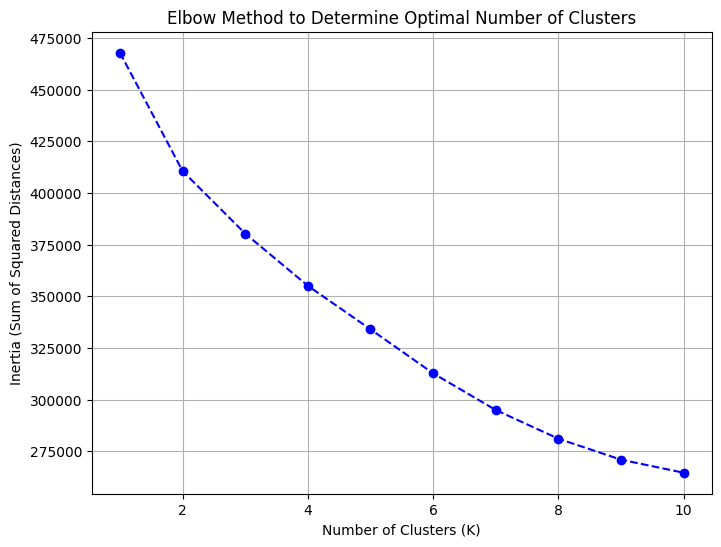

Cluster labels added to the DataFrame:
   Cluster_Labels
0               1
1               1
2               1
3               1
4               1


In [18]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# List to store inertia values (sum of squared distances) for each value of k
inertia_values = []

# We'll loop over potential cluster counts from 1 to 10
for num_clusters in range(1, 11):
    # Create a KMeans model. Using random_state=42 for reproducibility, n_init=10 for stability.
    # I increased n_init to 10 to avoid random fluctuations in cluster assignments.
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    
    # Fit the model to the data and capture the inertia
    kmeans.fit(final_data)
    inertia_values.append(kmeans.inertia_)

# Now let's plot the inertia values against the number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='--', color='b')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()

# Based on the elbow in the plot (which visually occurs around k=3), we'll proceed with 3 clusters.
optimal_clusters = 3

# Re-run KMeans with the optimal number of clusters
kmeans_final = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)

# Fit the model and predict the cluster labels for the data
cluster_labels = kmeans_final.fit_predict(final_data)

# Let's add the cluster labels to our DataFrame for further analysis.
df['Cluster_Labels'] = cluster_labels

# Output the first few rows of the DataFrame to verify the cluster assignments
print("Cluster labels added to the DataFrame:")
print(df[['Cluster_Labels']].head())


This code has run K-means clustering and selected the best number of clusters based on the Elbow Method.

1. **Elbow Method Plot**: The elbow plot helps to find the optimal number of clusters K by illustrating the relationship between the number of clusters and inertia. The "elbow" in the following plot occurs at K=3, indicating at which point inertia begins to decrease more gradually. That means K=3 is a good number for the number of clusters in this dataset.

2. **K-means Model**: The K-means algorithm is fitted with K=3 chosen, and cluster labels are assigned for each data point. This label is added as a new column named `'Cluster_Labels'` in the dataframe.

3. **Output Dataframe**: The output dataframe now includes the cluster labels of the respective observation. As can be seen from the first few rows, these labels will be useful in building a visualization of, and analyzing, how data clusters according to the K-means algorithms.

The resulting clustered dataset can now be used for further processing or visualization of the clustering results.



In this code-cell we will now do the implementation of **Hierarchical Clustering** using **Agglomerative Clustering** with two different linkage criteria: **Single Linkage** and **Average Linkage**.

1. **Hierarchical Clustering**: This clustering technique constructs a hierarchy of clusters. Agglomerative takes each separated observation in a cluster and, one by one, combines two closest clusters until the number of clusters reaches the desired number or only one cluster is left.

2. **Linkage Approaches**:
   - **Single Linkage**: It defines the distance between two clusters as the minimum distance between any two points in the clusters. This can result in elongated or "chained" clusters.
   - **Average Linkage**: This method defines the distance between two clusters based on the average distances between two sets of points from these clusters. This linkage type tends to produce more balanced clusters.

3. **Dendrograms**: Based on the experiment of hierarchical clustering represented by dendrograms, we can know how clusters are merged at different stages, and where the optimal number of clusters might be.

**Note**: The dataset is too big, so for hierarchical clustering and visualizations of the dendrogram, we sampled **10,000 samples** from the original. The complete dataset was too large to run efficiently on the local system, and that informed the need for sampling.



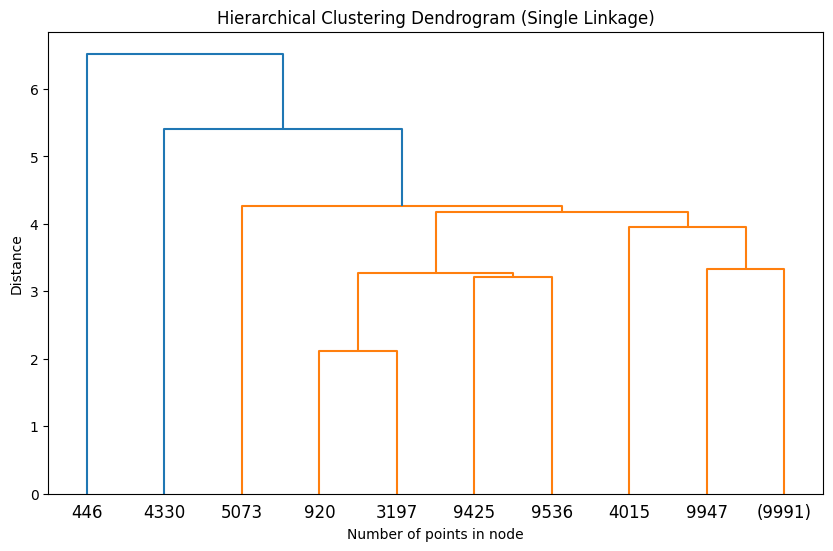

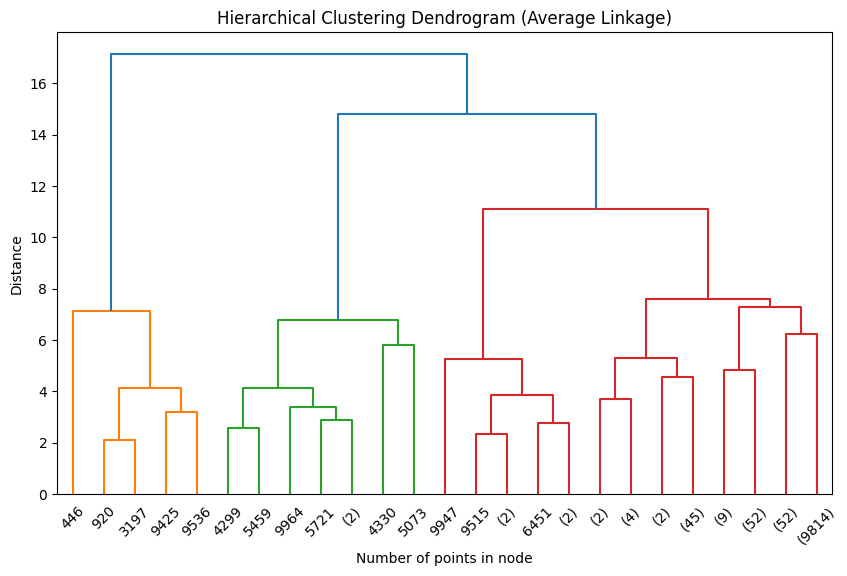

        age   balance       day  duration  campaign     pdays  previous  \
0  1.606965  0.256419 -1.298476  0.011016 -0.569351 -0.411453  -0.25194   
1  0.288529 -0.437895 -1.298476 -0.416127 -0.569351 -0.411453  -0.25194   
2 -0.747384 -0.446762 -1.298476 -0.707361 -0.569351 -0.411453  -0.25194   
3  0.571051  0.047205 -1.298476 -0.645231 -0.569351 -0.411453  -0.25194   
4 -0.747384 -0.447091 -1.298476 -0.233620 -0.569351 -0.411453  -0.25194   

   job_blue-collar  job_entrepreneur  job_housemaid  ...  month_mar  \
0              0.0               0.0            0.0  ...        0.0   
1              0.0               0.0            0.0  ...        0.0   
2              0.0               1.0            0.0  ...        0.0   
3              1.0               0.0            0.0  ...        0.0   
4              0.0               0.0            0.0  ...        0.0   

   month_may  month_nov  month_oct  month_sep  poutcome_other  \
0        1.0        0.0        0.0        0.0            

In [4]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

# Limit the data size for dendrogram visualization (using the first 1000 samples)
subset_data = final_data[:10000] # Using only a small subset of the data

def plot_dendrogram(data, method):
    linked = linkage(data, method=method)
    
    plt.figure(figsize=(10, 6))
    dendrogram(linked, truncate_mode='level', p=5)
    plt.title(f"Hierarchical Clustering Dendrogram ({method.capitalize()} Linkage)")
    plt.xlabel("Number of points in node")
    plt.ylabel("Distance")
    plt.show()

plot_dendrogram(subset_data, method='single')
plot_dendrogram(subset_data, method='average')

optimal_clusters = 3

# Apply Agglomerative Clustering on the subset data for clustering labels
model_single_subset = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='single')
cluster_labels_single_subset = model_single_subset.fit_predict(subset_data)

model_average_subset = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='average')
cluster_labels_average_subset = model_average_subset.fit_predict(subset_data)

subset_df = pd.DataFrame(subset_data, columns=final_data.columns)
subset_df['Hierarchical_Single_Linkage'] = cluster_labels_single_subset
subset_df['Hierarchical_Average_Linkage'] = cluster_labels_average_subset
print(subset_df.head())



The code has run **Hierarchical Clustering** on the dataset; however, it uses a subsample of the data due to restrictions in computational ability on running the full dataset.

1. **Dendrograms**:
   - The dendrogram shows how clusters are formed step by step. Single Linkage tends to combine clusters based on the closest points between these clusters. It forms long, chain-like clusters since some of the clusters are joined at a lower distance, and this can be seen in the dendrogram.
   - **Average Linkage**: With this, clusters tend to be more balanced in their structure, as the dendrogram shows, where clusters become merged at a more gradual pace over a wider range of distances.

2. **Labels of Clusters**:
   - By analyzing the dendrograms, we applied Agglomerative Clustering with the number of clusters (K=3). The cluster labels for each data point in the subset were added as new columns to the dataframe from the results of Single and Average Linkage: `Hierarchical_Single_Linkage` and `Hierarchical_Average_Linkage`.

**Note**: A sample size of 10,000 samples was used because of the size of the dataset, ensuring the code runs efficiently on a local system. This might limit the full clustering results, but this subset allows us to visualize some structure and behavior of hierarchical clustering on this dataset. The cluster labels are now in the output dataframe and can be used for further analysis or visualizations.



Now it is time, in this code cell, to visualize the results of clustering using **scatter plots** so that we can see how the data has been divided by the two algorithms: K-means and Hierarchical Clustering.

1. **Visualization Features**: We use two features from the dataset—**balance** and **age**—to visualize the scatter plots. These features have been selected because we are interested in observing the pattern or groupings of the clustering outcome.

2. **K-means Clustering**: The first plot will be for the clusters formed through the K-means algorithm on a complete dataset.

3. **Hierarchical (Single Linkage)**: The second plot will visualize the clusters that the Single Linkage method produces, from a subset of the dataset because of system limitations.

4. **Hierarchical Clustering (Average Linkage)**: The third plot will represent the clusters found by Average Linkage, once again on a subset of the data.

In each plot, we will color different clusters in different colors, and also add appropriate titles, axis labels, and legends.



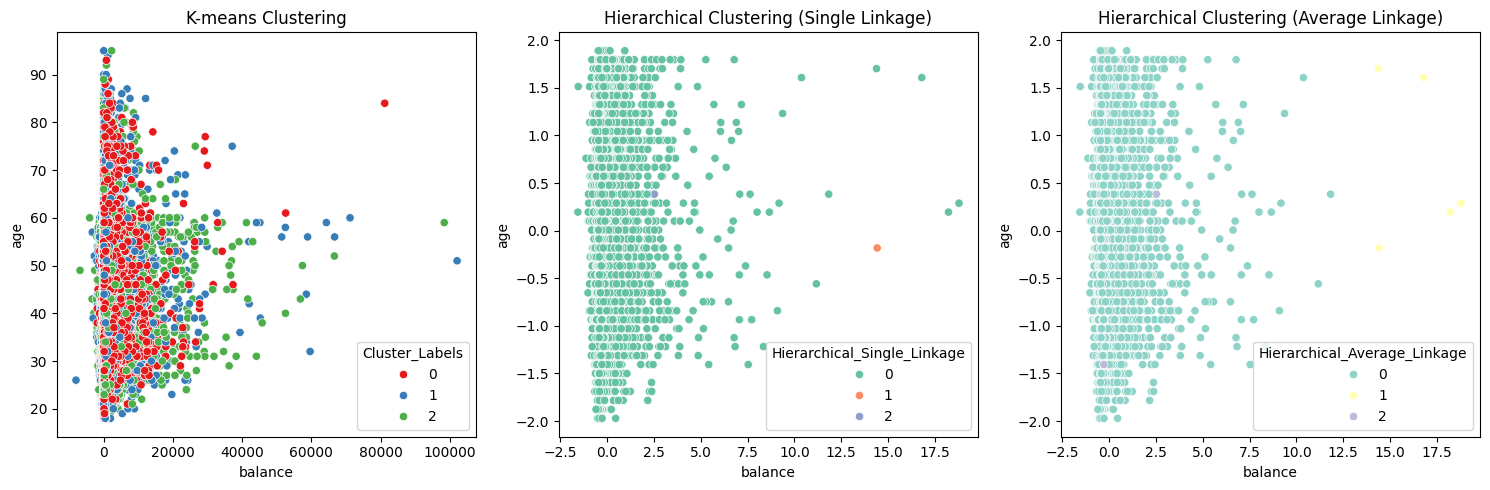

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

x_column = 'balance'
y_column = 'age'

plt.figure(figsize=(15, 5))

# First plot: K-means clustering results
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x=x_column, y=y_column, hue='Cluster_Labels', palette='Set1')
plt.title('K-means Clustering')
plt.xlabel(x_column)
plt.ylabel(y_column)

# Second plot: Hierarchical Clustering (Single Linkage)
plt.subplot(1, 3, 2)
sns.scatterplot(data=subset_df, x=x_column, y=y_column, hue='Hierarchical_Single_Linkage', palette='Set2')
plt.title('Hierarchical Clustering (Single Linkage)')
plt.xlabel(x_column)
plt.ylabel(y_column)

# Third plot: Hierarchical Clustering (Average Linkage)
plt.subplot(1, 3, 3)
sns.scatterplot(data=subset_df, x=x_column, y=y_column, hue='Hierarchical_Average_Linkage', palette='Set3')
plt.title('Hierarchical Clustering (Average Linkage)')
plt.xlabel(x_column)
plt.ylabel(y_column)


plt.tight_layout()
plt.show()


There is a scatter plot generated by this code resulting from clustering by K-means and Hierarchical Clustering for Single and Average Linkages.

1. **K-means clustering**: The first plot shows clusters resulting from applying the K-means method on the full dataset. In this plot, there are three different colors for three clusters, while the points scatter depending on the features of balance and age.

2. **Hierarchical Clustering (Single Linkage)**: The second chart presents clusters developed in the subset from the Single Linkage method. Here, the clusters typically form an "elongated" or "chained" structure, which is also reflected in this chart, where most points are from one cluster, but a few are classified as outliers.

3. **Hierarchical clustering - Average Linkage**: The third plot is for the clusters formed on the subset of data by Average Linkage. The method normally produces far more regular clusters. As can be seen from the plot, the points are distributed more equitably among the subject instance classes.

Each plot has appropriate titles, labeling of axes, and legends for clear representation of the clustering results. These visualizations provide insight into how different algorithms group data on selected features.



Within this code cell, we will **compare the performance** of K-means and Hierarchical clustering using the metric of **Silhouette Score**.

1. **Silhouette Score**: This metric will provide the quality of the clusters. It is a measure that summarizes **cohesion** (how close the points are within a cluster) and **separation** (how far apart the clusters are). It ranges from -1 to 1, where:
   - A close-to-**1** score is indicative of well-clustered points.
   - A score close to **0** means the clusters overlap.
   - A negative score indicates that the points may have been assigned to the wrong cluster.

2. **K-means vs. Hierarchical Clustering**:
   - We will calculate the Silhouette Score for K-means clustering, executed on the entire dataset.
   - Similarly, we will calculate the Silhouette Score for Single Linkage and Average Linkage methods of Hierarchical Clustering using the subset of data.

These scores will provide a quantitative comparison between the clustering methods and will help in identifying which method performs better on the dataset.



In [10]:
from sklearn.metrics import silhouette_score

silhouette_kmeans = silhouette_score(final_data, df['Cluster_Labels'])

silhouette_single = silhouette_score(subset_data, subset_df['Hierarchical_Single_Linkage'])
silhouette_average = silhouette_score(subset_data, subset_df['Hierarchical_Average_Linkage'])

print("Silhouette Score for K-means:", silhouette_kmeans)
print("Silhouette Score for Hierarchical Clustering (Single Linkage):", silhouette_single)
print("Silhouette Score for Hierarchical Clustering (Average Linkage):", silhouette_average)


Silhouette Score for K-means: 0.10474616910234279
Silhouette Score for Hierarchical Clustering (Single Linkage): 0.7789705388449759
Silhouette Score for Hierarchical Clustering (Average Linkage): 0.7658297601959609


The code has correctly calculated and printed the Silhouette Scores for K-means clustering and for both of the hierarchical clustering methods: Single and Average Linkage.

1. **K-means Clustering**: The Silhouette Score for K-means clustering on the full dataset is **0.1047**, which indicates that there is a lot of overlap between the clusters and they are not well differentiated.

2. **Hierarchical Clustering (Single Linkage)**: The Silhouette Score for Single Linkage clustering on the subset is **0.779**, meaning this method has much more cohesive and separated clusters than K-means.

3. **Hierarchical Clustering (Average Linkage)**: The mean silhouette score for Average Linkage clustering of the subset is **0.766**, which generally matches that of the Single Linkage. It also indicates well-separated, cohesive clusters.

**Comparison**:
From the Silhouette scores, it can be seen that **Hierarchical Clustering**—both Single and Average Linkage—performs better on this data compared to **K-means**. Note that the hierarchical methods were applied to a subset, while K-means was applied to the full dataset. This comparison provides quantitative evidence that hierarchical clustering methods may prove to be better in clustering this data, though in some use cases, further analysis may be required.



1. **Which clustering algorithm resulted in the best separation of clusters?**

Based on both **visualizations** and **Silhouette Scores**:
- K-means Clustering has the lowest Silhouette Score of 0.104, indicating that there is not strong separation between the clusters. In the plot, there is also substantial overlap between the clusters, especially in the regions where balance is around zero. K-means failed to generate well-separated clusters from the dataset.
- **Hierarchical Clustering (Single Linkage)** gave the highest Silhouette Score of 0.779, but as seen from the plot, single linkage clustering tends to merge most of the data points into one huge cluster, with a few outliers forming separate clusters. This behavior suggests that while the silhouette score is high, the cluster separation may not be as meaningful, as most points are placed within one cluster.
- **Hierarchical Clustering (Average Linkage)** returns a **Silhouette Score** of 0.766, which is relatively close to single linkage. The plot shows that average linkage tends to distribute points more evenly across clusters than single linkage, though still without sharp separation between all clusters.

**Best Separation**:
Both hierarchical methods provide high Silhouette Scores, but **Single Linkage** creates a large single cluster, which may not be desirable. **Average Linkage** allows for somewhat better cluster separation, and the silhouette score is high. However, the overall structure of the dataset seems to make it difficult to separate into well-defined clusters. 

In this case, **Average Linkage** might be a better choice, since it avoids the issue of placing everything into one cluster (as single linkage does), while still yielding a relatively high Silhouette Score.

2. **What are some challenges that you faced while trying to cluster?**

Challenges during the clustering process include:
1. **Overlapping Data**: The K-means plot shows there is overlap between the clusters, particularly among low-balance customers. This suggests that the data may not naturally fall into distinct groups, making clustering algorithms' tasks difficult.
   
2. **Hierarchical Clustering Performance**: Although single and average linkage hierarchical clustering had higher silhouette scores, these approaches faced issues:
   - **Single Linkage** tends to form elongated or large clusters, and in the plot, most points are grouped into one cluster, showing poor separation.
   - **Average Linkage** produced better-separated clusters, but many points were still clustered too closely to form meaningful distinctions.

3. **Data Size**: Hierarchical clustering is computationally expensive with large datasets. This was handled by using a subset for visualization, and running the full algorithm on the entire dataset without generating dendrograms.

4. **Silhouette Scores**: While hierarchical clustering scored better, the relatively low Silhouette Scores suggest that the dataset doesn't contain naturally well-separated clusters. This may indicate that the features used (age and balance) are not sufficient to capture clear clustering patterns, or that the data itself doesn't have strongly distinguishable clusters.

